In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [193]:
os.chdir(r"C:\Users\Owner\Downloads\Project_1")
df = pd.read_csv(r"C:\Users\Owner\Downloads\Project_1\Project 1\train.csv")
df

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27316,279212,NaN,140,43,72,Puerto Rico,PR,Coamo,Coamo,Urban,...,42.73154,40.16667,24.79821,230.87898,938.0,0.60422,0.24603,0.03042,0.02249,0.14683
27317,277856,NaN,140,91,42,Pennsylvania,PA,Blue Bell,Blue Bell,Borough,...,38.21269,39.50000,21.84826,496.20427,2039.0,0.68072,0.61127,0.05003,0.02473,0.04888
27318,233000,NaN,140,87,8,Colorado,CO,Weldona,Saddle Ridge,City,...,43.40218,46.33333,23.40858,316.52078,1364.0,0.78508,0.70451,0.01386,0.00520,0.07712
27319,287425,NaN,140,439,48,Texas,TX,Colleyville,Colleyville City,Town,...,39.25921,43.41667,21.36235,1373.94120,5815.0,0.93970,0.75503,0.02287,0.00915,0.05261


## Data Importation and Preparation

In [194]:
df.nunique()

UID            27161
BLOCKID            0
SUMLEVEL           1
COUNTYID         296
STATEID           52
               ...  
pct_own        22302
married        20282
married_snp    10350
separated       6190
divorced       13688
Length: 80, dtype: int64

In [195]:
df.isna().sum()

UID                0
BLOCKID        27321
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          268
married          191
married_snp      191
separated        191
divorced         191
Length: 80, dtype: int64

###### <font color = 'yellow'> Analysis of the dataframe reveals that all values in the 'BlockID' column are missing. Therefore, this column will be dropped. <br> Further analysis reveals that the values in the 'SumLevel' column are constant each row and therefore will not influence our model building and will be dropped.

#### 3. Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

In [36]:
df.drop(columns=['BLOCKID',"SUMLEVEL"],inplace=True)

In [37]:
df.isnull().sum()

UID              0
COUNTYID         0
STATEID          0
state            0
state_ab         0
              ... 
pct_own        268
married        191
married_snp    191
separated      191
divorced       191
Length: 78, dtype: int64

In [38]:
# Dropping null values
df.dropna(inplace = True)

In [39]:
#To check if all null values have been successfully dropped.
df.isna().sum().sum()

0

###### <font color ='yellow'> All null values within the dataset have been dropped.

In [40]:
df

,UID,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,63,18,Indiana,IN,Danville,Danville,City,tract,46122,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27316,279212,43,72,Puerto Rico,PR,Coamo,Coamo,Urban,tract,769,...,42.73154,40.16667,24.79821,230.87898,938.0,0.60422,0.24603,0.03042,0.02249,0.14683
27317,277856,91,42,Pennsylvania,PA,Blue Bell,Blue Bell,Borough,tract,19422,...,38.21269,39.50000,21.84826,496.20427,2039.0,0.68072,0.61127,0.05003,0.02473,0.04888
27318,233000,87,8,Colorado,CO,Weldona,Saddle Ridge,City,tract,80653,...,43.40218,46.33333,23.40858,316.52078,1364.0,0.78508,0.70451,0.01386,0.00520,0.07712
27319,287425,439,48,Texas,TX,Colleyville,Colleyville City,Town,tract,76034,...,39.25921,43.41667,21.36235,1373.94120,5815.0,0.93970,0.75503,0.02287,0.00915,0.05261


### <font color = 'orange'> Debt Analysis

##### <font color = 'white'> A. Top 2500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10%. <br> - Visualize using geo-map <br> - Keep the limit for the percent of households with a second mortgage to 50%.

In [41]:
df2 = df[['place', 'pct_own', 'second_mortgage', 'lat', 'lng']][(df['pct_own'] > 0.1)&(df['second_mortgage'] <= 0.5)]
df2

,place,pct_own,second_mortgage,lat,lng
0,Hamilton,0.79046,0.02077,42.840812,-75.501524
1,Roseland,0.52483,0.02222,41.701441,-86.266614
2,Danville,0.85331,0.00000,39.792202,-86.515246
3,Guaynabo,0.65037,0.01086,18.396103,-66.104169
4,Manhattan City,0.13046,0.05426,39.195573,-96.569366
...,...,...,...,...,...
27316,Coamo,0.60422,0.00000,18.076060,-66.358379
27317,Blue Bell,0.68072,0.02112,40.158138,-75.307271
27318,Saddle Ridge,0.78508,0.02024,40.410316,-103.814003
27319,Colleyville City,0.93970,0.07550,32.904866,-97.162151


In [42]:
df2 = df2.sort_values(by='second_mortgage', ascending =False)
df2

,place,pct_own,second_mortgage,lat,lng
3285,Farmville,0.62069,0.50000,37.297357,-78.396452
11980,Worcester City,0.20247,0.43363,42.254262,-71.800347
26018,Harbor Hills,0.15618,0.31818,40.751809,-73.853582
7829,Glen Burnie,0.22380,0.30212,39.127273,-76.635265
2077,Egypt Lake-leto,0.11618,0.28972,28.029063,-82.495395
...,...,...,...,...,...
4090,Monterey City,0.33470,0.00000,36.611433,-121.904203
17516,Evergreen Park,0.86652,0.00000,41.723654,-87.610824
13255,Metuchen,0.73748,0.00000,40.544356,-74.351681
23898,Hobbs City,0.74498,0.00000,32.736362,-103.135858


In [43]:
df3 = df2.head(2500)
df3

,place,pct_own,second_mortgage,lat,lng
3285,Farmville,0.62069,0.50000,37.297357,-78.396452
11980,Worcester City,0.20247,0.43363,42.254262,-71.800347
26018,Harbor Hills,0.15618,0.31818,40.751809,-73.853582
7829,Glen Burnie,0.22380,0.30212,39.127273,-76.635265
2077,Egypt Lake-leto,0.11618,0.28972,28.029063,-82.495395
...,...,...,...,...,...
24443,Manteca City,0.67116,0.06814,37.732143,-121.242902
8377,Cutler Bay,0.50519,0.06813,25.550391,-80.347791
16621,Keller City,0.97987,0.06812,32.913822,-97.204310
13987,Jacksonburg,0.92888,0.06812,39.556756,-84.443252


In [44]:
import plotly.graph_objects as go

In [181]:
fig = go.Figure(data=go.Scattergeo(lat=df3['lat'], lon=df3['lng'], text=df3['place']), layout = dict(title='Top 2500 Location with the Highest Second Mortgage', geo=dict(scope='usa')))
fig

##### <font color ='orange'> Bad Debt

In [196]:
df['bad_debt']=df['second_mortgage']+df['home_equity']-df['home_equity_second_mortgage']

In [197]:
df['second_mortgage']

0        0.02077
1        0.02222
2        0.00000
3        0.01086
4        0.05426
          ...   
27316    0.00000
27317    0.02112
27318    0.02024
27319    0.07550
27320    0.01412
Name: second_mortgage, Length: 27321, dtype: float64

In [198]:
df_pie=[df['debt'].sum(),df['bad_debt'].sum()]
df_pie

[16902.55526, 2823.39154]

###### <font color = 'yellow' > Of the 16,746.17 (85.7%) Overall debt, 2,796.55 (14.3%) are bad debt.

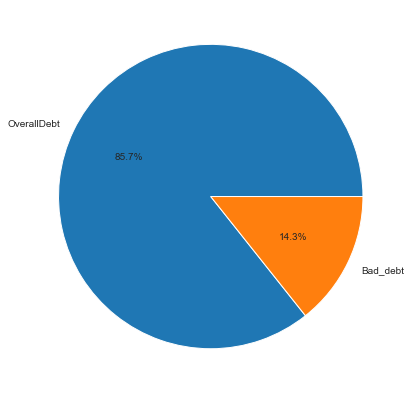

In [49]:
plt.figure(figsize=(15,7))
plt.pie(df_pie, labels=['OverallDebt', 'Bad_debt'], autopct='%.1f%%');
# f: float
# .1: 1 decimal place

##### <font color = 'orange'> Distribution of 2nd Mortgage, Home Equity, Good Debt, and Bad Debt across different cities.

In [199]:
df['good_debt'] = df['debt'] - df['bad_debt']
df['good_debt']

0        0.43555
1        0.56581
2        0.63972
3        0.51628
4        0.46512
          ...   
27316    0.11694
27317    0.44456
27318    0.50238
27319    0.51417
27320    0.47175
Name: good_debt, Length: 27321, dtype: float64

In [200]:
df['good_debt'] = df['debt'] - df['bad_debt']
df['good_debt']

0        0.43555
1        0.56581
2        0.63972
3        0.51628
4        0.46512
          ...   
27316    0.11694
27317    0.44456
27318    0.50238
27319    0.51417
27320    0.47175
Name: good_debt, Length: 27321, dtype: float64

In [201]:
df['city'].head()

0      Hamilton
1    South Bend
2      Danville
3      San Juan
4     Manhattan
Name: city, dtype: object

In [202]:
df_cities=df[(df['city']=='Hamilton')|(df['city']=='South Bend')|(df['city']=='Danville')|(df['city']=='San Juan')|(df['city']=='Manhattan')]
# to search within the city column

<AxesSubplot:xlabel='city', ylabel='good_debt'>

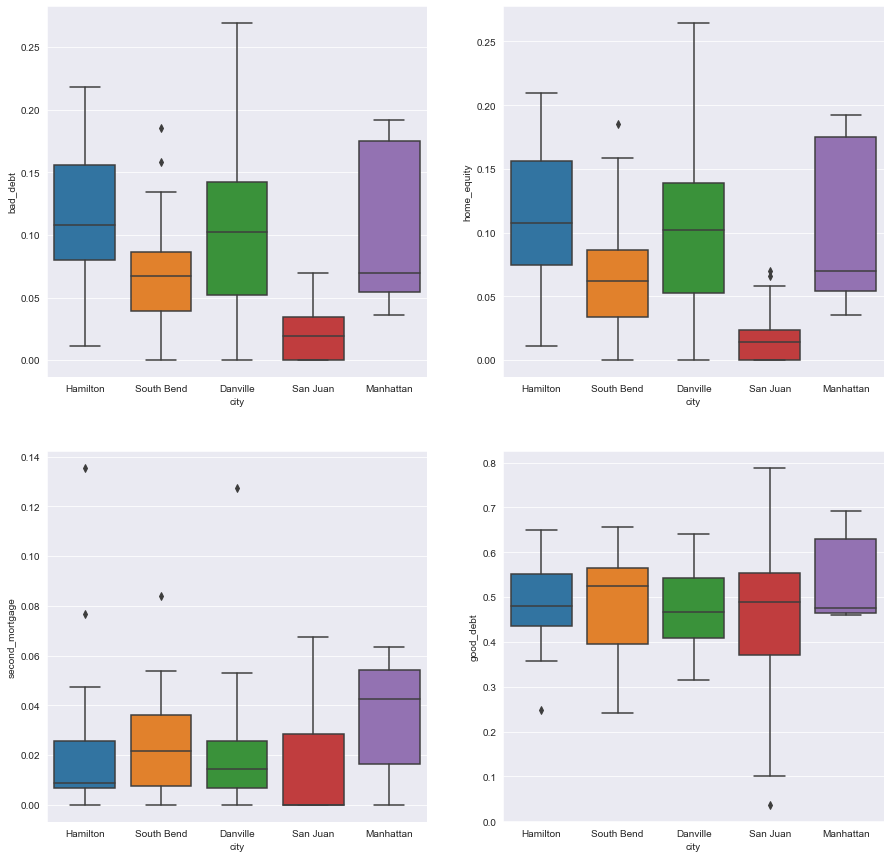

In [203]:
fig,axes = plt.subplots(ncols=2,nrows=2, figsize = (15,15))
sns.boxplot(y='bad_debt', x = 'city', data=df_cities, ax = axes[0,0])
sns.boxplot(y='home_equity', x = 'city', data=df_cities, ax = axes[0,1])
sns.boxplot(y='second_mortgage', x = 'city', data=df_cities, ax = axes[1,0])
sns.boxplot(y='good_debt', x = 'city', data=df_cities, ax = axes[1,1])

###### <font color ='yellow'> Observations
--------
###### <font color ='yellow'> Second Mortgage <br> - Second mortgage has a higher median value (highest median percent of houses with a second mortgage) for Hamilton City than Manhattan.
--------
###### <font color = 'yellow'> Home Equity  <br> - There are more houses in Hamilton City, Danville City, and Manhattan with a home equity loan when compared to South Bend and San Juan city. <br> - Hamilton City has the highest median percent of houses with a home equity loan.
-------
###### <font color ='yellow'> Bad Debt <br> - Hamilton City (10%) has a higher median value (higher percentage) of bad debt within households compared to South Bend city (6%). <br> - San Juan has the lowest median value (the lowest percentage) of bad debt within households.
------
###### <font color ='yellow'> Good Debt <br> - Good debt has a higher median value(higher percentage of houses with good debt) for Hamilton City than for South Bend. <br>

##### E. Collated income distribution chart for family income, household income, and remaining income

In [204]:
df['remaining_inc'] = df['family_mean'] - df['hi_mean']
df['remaining_inc']

0         4868.86384
1         8738.17744
2        10319.83114
3         7668.01017
4        22219.26930
            ...     
27316     2373.47596
27317     -993.01490
27318     8988.31921
27319     1638.56660
27320     3237.89124
Name: remaining_inc, Length: 27321, dtype: float64

<AxesSubplot:xlabel='remaining_inc', ylabel='Count'>

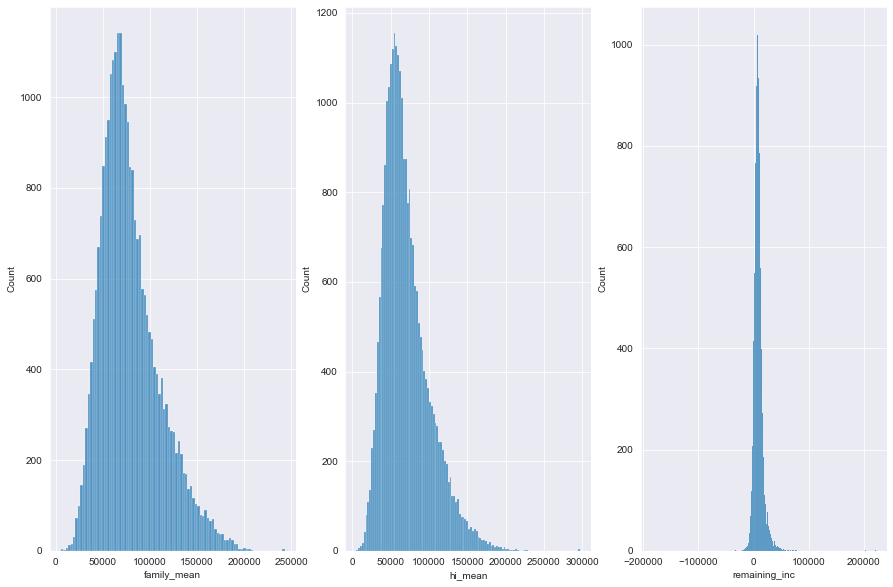

In [205]:
fig,axes = plt.subplots(ncols=3, nrows=1, figsize=(15,10))
sns.histplot(x = df['family_mean'], ax=axes[0])
sns.histplot(x = df['hi_mean'], ax=axes[1])
sns.histplot(x = df['remaining_inc'], ax=axes[2])

## EDA

#### 1. Develop insights into population density, and age.

In [206]:
df['pop_density'] = df['pop']/df['ALand']
# population deivided by the land area
df.pop_density.head()

0    0.000026
1    0.001687
2    0.000099
3    0.002442
4    0.002207
Name: pop_density, dtype: float64

#### B.

In [207]:
df['median_age'] = ((df['male_pop'] * df['male_age_median']) + (df['female_pop'] * df['female_age_median']))\
                   / (df['male_pop'] + df['female_pop'])
# '\' this is used to make code look tidy. It is used to continue syntax on next row

<AxesSubplot:xlabel='median_age', ylabel='Count'>

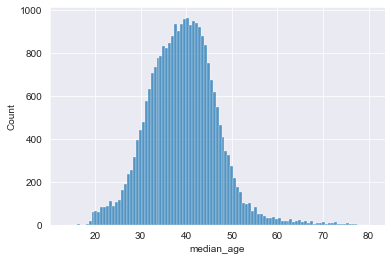

In [208]:
sns.histplot(df['median_age'])

###### <font color ='yellow'> The population is between the ages of 20 to 60 years old. <br> The majority of the population are aged 40. <br> The median age histogram has a normal distribution with a minimal right skewness.

#### 2. Create population bins by selecting the appropriate class intervals so that the number of categories don't exceed 5. <br> Analyze the married, separated, and divorced population for these population bins.

In [209]:
df['pop'].describe()

count    27321.000000
mean      4316.032685
std       2169.226173
min          0.000000
25%       2885.000000
50%       4042.000000
75%       5430.000000
max      53812.000000
Name: pop, dtype: float64

In [61]:
53812/3

17937.333333333332

###### <font color = 'teal'> The total population is 53,812 people which is separated into 3 bins.

In [210]:
df['pop_bins'] = pd.cut(df['pop'], bins = [0, 18000, 36000, 54000])
df['pop_bins']

0        (0, 18000]
1        (0, 18000]
2        (0, 18000]
3        (0, 18000]
4        (0, 18000]
            ...    
27316    (0, 18000]
27317    (0, 18000]
27318    (0, 18000]
27319    (0, 18000]
27320    (0, 18000]
Name: pop_bins, Length: 27321, dtype: category
Categories (3, interval[int64, right]): [(0, 18000] < (18000, 36000] < (36000, 54000]]

In [211]:
chart = df.groupby(by='pop_bins')[['married', 'separated', 'divorced']].mean()
chart

,married,separated,divorced
pop_bins,,,
"(0, 18000]",0.508198,0.019099,0.100293
"(18000, 36000]",0.640555,0.010473,0.065222
"(36000, 54000]",0.484677,0.003262,0.022448


###### <font color = 'yellow'> From all 3 bins, it is clear that majority of the population is married. <br> Within the first population bin: <br> - 51% are married <br> - Less than 0.2% are separated <br> - 10% are divorced. <br> Within the second population bin: <br> - 64% are married <br> - 1% are separated <br> - 6.5% are divorced. <br> Within the final population bin: <br> - 78% are married <br> - Less than 1% are separated <br> - 4.6% are divorced.

<AxesSubplot:xlabel='pop_bins'>

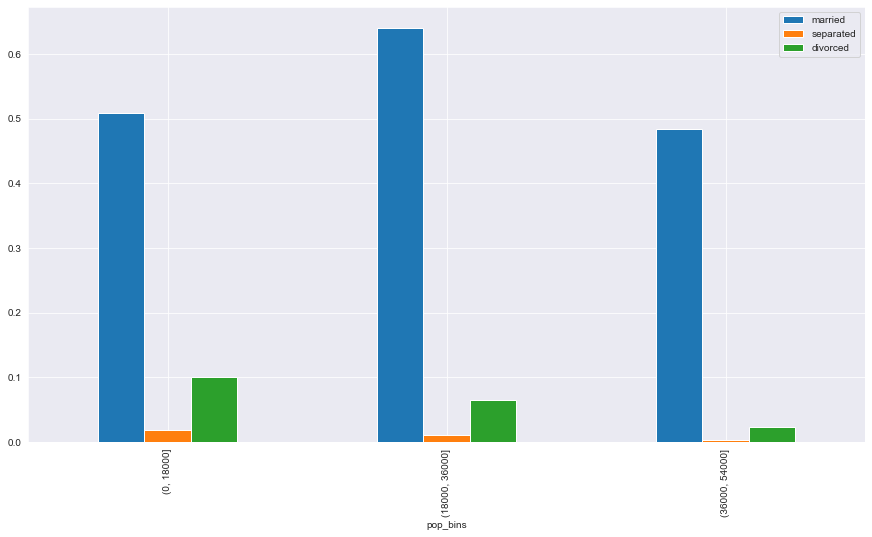

In [212]:
chart.plot(kind='bar', figsize = (15,8))

###### <font color ='yellow'> There are more married people than there are separated or divorced. <br> The lower population bin has a higher percentage of divorced people compared to the other bins.

#### 3. Rent as a percentage of income at an overall level, and for different states.


In [213]:
#overall level
df['rent_mean'].sum()/df['family_mean'].sum() * 100

1.335026150593371

###### <font color ='yellow'> At an overall level, people use on average 1.32% of their income to pay rent.

In [214]:
#State level
df_State = df.groupby(by = 'state')[['rent_mean', 'family_mean']].mean()
df_State

,rent_mean,family_mean
state,,
Alabama,771.942892,66942.356573
Alaska,1185.763570,92136.545109
Arizona,1098.554723,73243.455273
Arkansas,717.163401,64765.377850
California,1475.443299,87742.239898
Colorado,1200.006260,88643.318742
Connecticut,1317.906600,104306.108556
Delaware,1127.309811,87190.491455
District of Columbia,1428.235439,108245.694704


In [215]:
High_rent = df_State.sort_values(by = 'rent_mean', ascending = False)
High_rent.head()

,rent_mean,family_mean
state,,
Hawaii,1732.121228,94356.188022
California,1475.443299,87742.239898
District of Columbia,1428.235439,108245.694704
Maryland,1416.749913,101493.044145
New Jersey,1384.884411,101154.768001


###### <font color = 'yellow'> These are the top 5 states with the highest rent average: <br> 1. Hawaii - 1677 <br> 2. California - 1479 <br> 3. District of Colombia - 1416 <br> 4. Maryland - 1412 <br> 5. New Jersey - 1385

In [216]:
#percentage of income
df_State['rent/income'] = df_State['rent_mean']/df_State['family_mean'] * 100
df_State.sort_values(by = 'rent/income', ascending = False)

,rent_mean,family_mean,rent/income
state,,,
Hawaii,1732.121228,94356.188022,1.835726
California,1475.443299,87742.239898,1.681566
Florida,1143.184098,72291.978521,1.581343
Puerto Rico,523.321866,34239.765756,1.528404
Nevada,1129.249309,74007.977817,1.525848
Arizona,1098.554723,73243.455273,1.499867
New York,1253.042899,86837.921486,1.442967
Virginia,1310.874257,93196.877897,1.406565
Maryland,1416.749913,101493.044145,1.395908


###### <font color = 'yellow'> In the state of Hawaii, the average family income is 96,133, and the average rent is 1677. Therefore, families in the state of Hawaii, use 1.74% of their income to pay for rent. <br> The following 5 states use the highest percentage of their income to pay for rent: <br> 1. Hawaii - 1.74% <br> 2. California - 1.67% <br> 3. Florida - 1.58% <br> 4. Puerto Rico - 1.54% <br> 5. Nevada - 1.52%
--------
###### <font color = 'orange'> Iowa, South Dakota, and North Dakota rank lowest in the percentage of their income used to pay rent. <br> Each state use less than 1% of their income to pay rent. <br> - Iowa: 0.99% <br> - South Dakota: 0.91% <br> - North Dakota: 0.91%
-------
###### <font color = 'green'> In Puerto Rico and Florida, the average family income and rent is less when compared to Hawaii or California. Although family income and rent might be lower, the cost of living in all these 4 states is relatively high.

#### Correlation Analysis

In [217]:
df

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,married,married_snp,separated,divorced,bad_debt,good_debt,remaining_inc,pop_density,median_age,pop_bins
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,0.57851,0.01882,0.01240,0.08770,0.09408,0.43555,4868.86384,0.000026,44.667430,"(0, 18000]"
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,0.34886,0.01426,0.01426,0.09030,0.04274,0.56581,8738.17744,0.001687,34.722748,"(0, 18000]"
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,0.64745,0.02830,0.01607,0.10657,0.09512,0.63972,10319.83114,0.000099,41.774472,"(0, 18000]"
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,0.47257,0.02021,0.02021,0.10106,0.01086,0.51628,7668.01017,0.002442,49.879012,"(0, 18000]"
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,0.12356,0.00000,0.00000,0.03109,0.05426,0.46512,22219.26930,0.002207,21.965629,"(0, 18000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27316,279212,NaN,140,43,72,Puerto Rico,PR,Coamo,Coamo,Urban,...,0.24603,0.03042,0.02249,0.14683,0.00000,0.11694,2373.47596,0.002650,40.904894,"(0, 18000]"
27317,277856,NaN,140,91,42,Pennsylvania,PA,Blue Bell,Blue Bell,Borough,...,0.61127,0.05003,0.02473,0.04888,0.20908,0.44456,-993.01490,0.000818,39.160488,"(0, 18000]"
27318,233000,NaN,140,87,8,Colorado,CO,Weldona,Saddle Ridge,City,...,0.70451,0.01386,0.00520,0.07712,0.07857,0.50238,8988.31921,0.000002,44.089311,"(0, 18000]"
27319,287425,NaN,140,439,48,Texas,TX,Colleyville,Colleyville City,Town,...,0.75503,0.02287,0.00915,0.05261,0.14305,0.51417,1638.56660,0.000619,45.029280,"(0, 18000]"


In [218]:
df.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [219]:
correlation_df = df[['second_mortgage', 'home_equity', 'pop', 'family_mean','bad_debt', 'pct_own', 'married', 'divorced', 'separated', 'remaining_inc', 'median_age', 'hi_mean', 'home_equity_second_mortgage', 'hs_degree']]
a = correlation_df.corr()

<AxesSubplot:>

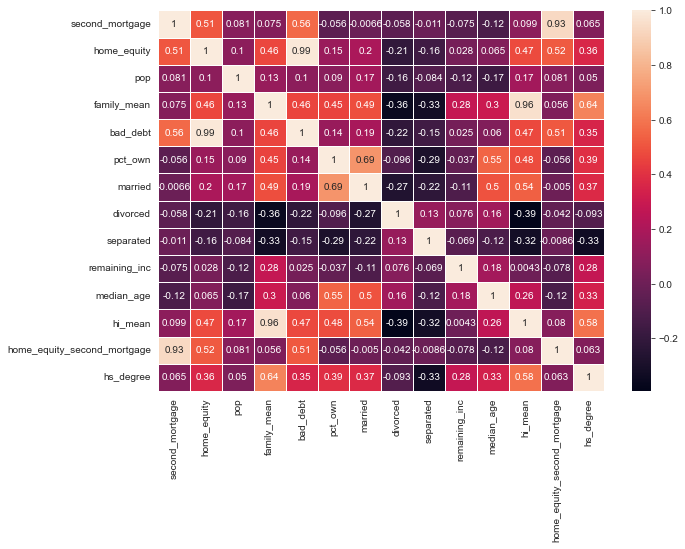

In [220]:
plt.figure(figsize=(10, 7))
sns.heatmap(a, annot = True, linewidths = .5)

In [73]:
# df.to_csv('Output1.csv)

## Data Pre-Processing

In [74]:
# Variables to be considered in the FA:
df_fa = df[['family_mean', 'divorced', 'married', 'home_equity', 'second_mortgage', 'hs_degree', 'median_age', 'pct_own', 'bad_debt', 'hi_mean']]
df_fa

,family_mean,divorced,married,home_equity,second_mortgage,hs_degree,median_age,pct_own,bad_debt,hi_mean
0,67994.14790,0.08770,0.57851,0.08919,0.02077,0.89288,44.667430,0.79046,0.09408,63125.28406
1,50670.10337,0.09030,0.34886,0.04274,0.02222,0.90487,34.722748,0.52483,0.04274,41931.92593
2,95262.51431,0.10657,0.64745,0.09512,0.00000,0.94288,41.774472,0.85331,0.09512,84942.68317
3,56401.68133,0.10106,0.47257,0.01086,0.01086,0.91500,49.879012,0.65037,0.01086,48733.67116
4,54053.42396,0.03109,0.12356,0.05426,0.05426,1.00000,21.965629,0.13046,0.05426,31834.15466
...,...,...,...,...,...,...,...,...,...,...
27316,20889.14617,0.14683,0.24603,0.00000,0.00000,0.60155,40.904894,0.60422,0.00000,18515.67021
27317,118896.06830,0.04888,0.61127,0.19641,0.02112,0.95737,39.160488,0.68072,0.20908,119889.08320
27318,88878.57034,0.07712,0.70451,0.07857,0.02024,0.93555,44.089311,0.78508,0.07857,79890.25113
27319,167148.83770,0.05261,0.75503,0.12556,0.07550,0.98540,45.029280,0.93970,0.14305,165510.27110


In [75]:
df_fa.shape

(26585, 10)

In [76]:
df_fa.isnull().sum().sum()

0

In [77]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df_fa)
chi_square_value, p_value

(258508.57382627338, 0.0)

###### <font color = 'yellow'> The p-value in this Bartlett Test is 0, therefore the test was statistically significant. The observed matrix is not an identity matrix. <br> Correlation is present among the variables.

In [78]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df_fa)
kmo_model

0.7128915593240706

###### <font color = 'yellow'> The KMO value is 0.71. It is greater than 0.6 which means FA can be performed on df_fa

In [182]:
from sklearn.preprocessing import StandardScaler
#the scaler object (model)
scaler = StandardScaler()
#fit and transform the data
scaled_data_df = scaler.fit_transform(df_fa)

In [183]:
scaled_data_df

array([[-0.36267632, -0.27477163,  0.5043254 , ...,  0.65732321,
        -0.16413614, -0.25373188],
       [-0.91928223, -0.22025652, -1.25295184, ..., -0.58124857,
        -0.9224153 , -0.96286879],
       [ 0.51343167,  0.12088226,  1.03185291, ...,  0.95037834,
        -0.1487756 ,  0.47628566],
       ...,
       [ 0.30832131, -0.49660619,  1.46847489, ...,  0.6322375 ,
        -0.39321502,  0.30722958],
       [ 2.82307432, -1.01051593,  1.85505293, ...,  1.3531951 ,
         0.55913871,  3.17210432],
       [-0.78382676,  0.67924277, -1.28815095, ..., -1.72693796,
         1.15834763, -0.63775941]])

In [184]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors = scaled_data_df.shape[1] , rotation = None)
fa.fit(scaled_data_df)
ev, v = fa.get_eigenvalues()
ev

array([4.32559455, 2.0939346 , 1.16232468, 0.82044636, 0.50296384,
       0.40153562, 0.38130666, 0.27281076, 0.02680289, 0.01228003])

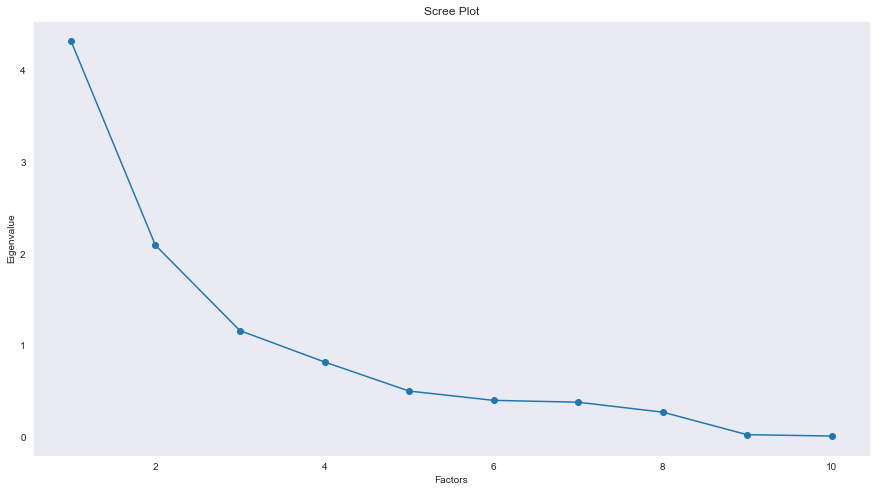

In [221]:
plt.figure(figsize=(15, 8))
plt.scatter(range(1, scaled_data_df.shape[1]+1), ev)
plt.plot(range(1, scaled_data_df.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()

###### <font color = 'yellow'> Using Bartlett and KMO test, we infer the dataset is statistically significant to perform Factor Analysis. Through the Eigen Value criterion and Scree plot, we infer there are 3 optimal number of factors.

In [163]:
fa = FactorAnalyzer(n_factors = 7, rotation = 'varimax')
Factors = fa.fit_transform(scaled_data_df)
pd.DataFrame(Factors)

,0,1,2,3,4,5,6
0,-0.101013,0.713562,-0.728594,-0.396183,-0.224817,0.423089,0.246110
1,-0.906266,-0.907360,-0.891728,-0.598837,0.003727,1.312658,-0.212231
2,-0.061643,0.854260,0.192920,0.241104,-0.978614,0.579597,-0.199518
3,-1.466959,0.179320,-0.778305,-0.385693,-0.052423,1.058372,0.985037
4,-1.101865,-3.096208,-1.059749,-2.144776,1.017927,3.078790,-0.436881
...,...,...,...,...,...,...,...
26580,-0.967816,-0.725958,-0.877576,0.593698,-0.659688,-1.955431,0.598847
26581,1.442620,0.284515,1.128814,-0.665406,-0.883354,0.235067,-0.543844
26582,-0.543556,1.087030,-0.146814,-0.504143,-0.070947,0.653488,0.049693
26583,-0.761138,1.304756,3.307839,-0.258776,1.919697,-0.179045,-0.225037


In [165]:
loading = pd.DataFrame(fa.loadings_, columns = ['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6', 'Factor7'],index = df_fa.columns)
loading

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7
family_mean,0.267444,0.277365,0.838462,-0.169925,0.001833,0.265889,0.094035
divorced,-0.110489,-0.101294,-0.203487,0.958954,-0.013867,0.008689,0.079778
married,0.072772,0.817306,0.229727,-0.180396,-0.009859,0.089632,0.042258
home_equity,0.939742,0.070763,0.214860,-0.077187,0.175698,0.117735,0.004183
second_mortgage,0.358189,-0.057365,0.008840,-0.013329,0.927984,0.006296,-0.044271
hs_degree,0.201991,0.255854,0.340682,0.015760,0.010452,0.873993,0.091944
median_age,0.016683,0.566943,0.082505,0.172444,-0.082025,0.145834,0.584247
pct_own,0.047183,0.768608,0.212941,-0.018346,-0.027098,0.139343,0.103884
bad_debt,0.927818,0.062066,0.217290,-0.081816,0.242913,0.111381,0.015126
hi_mean,0.274301,0.345154,0.855058,-0.186036,0.025394,0.184737,-0.010863


###### <font color = 'yellow'> </u> Factor 1 explains the common variance in people are bad payers i.e the variance among the people who have a home equity loan and have bad debt. <br> </u> Factor 2 explains the common variance in people based on whether they are married and own property i.e married and pct_owm. <br> </u> Factor 3 explains the common variance in people is wealth i.e based on household income and family income. <br> Factor 4 explains the common variance in people who are divorced. <br> Factor 5 explains the common variance in people who have a second mortgage. <br> Factor 6 explains the common variance in people who are high school graduates. <br> Factor 7 explains the common variance in people based on their age.

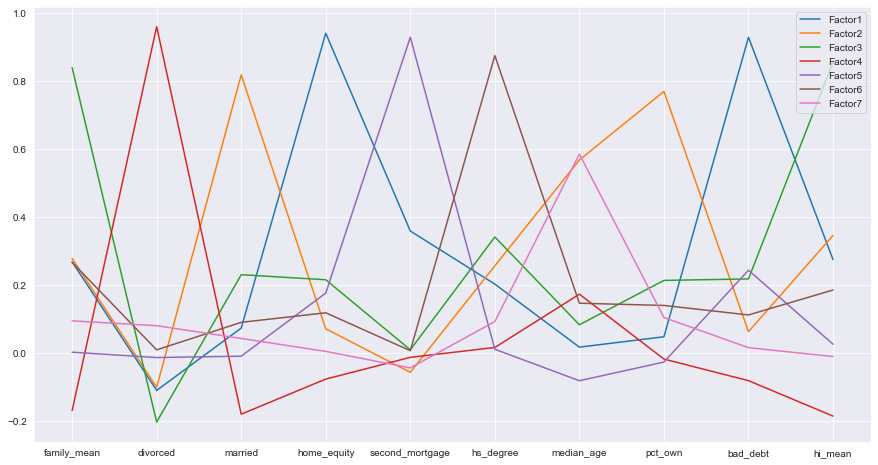

In [222]:
plt.figure(figsize= (15, 8))
plt.plot(loading)
plt.legend(['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6', 'Factor7']);

In [167]:
vars = pd.DataFrame(fa.get_factor_variance(), index = ['Variance', 'Proportional Var', 'Culmulative Var'])
vars

,0,1,2,3,4,5,6
Variance,2.079837,1.864107,1.789998,1.058771,0.959540,0.943788,0.379907
Proportional Var,0.207984,0.186411,0.179000,0.105877,0.095954,0.094379,0.037991
Culmulative Var,0.207984,0.394394,0.573394,0.679271,0.775225,0.869604,0.907595


In [168]:
commun = pd.DataFrame(fa.get_communalities(), index = df_fa.columns, columns = ['Communalities'])
commun

,Communalities
family_mean,0.959894
divorced,0.990100
married,0.768519
home_equity,0.984994
second_mortgage,0.995000
hs_degree,0.995000
median_age,0.727587
pct_own,0.669608
bad_debt,0.990248
hi_mean,0.994997


In [169]:
# Features
Factors

array([[-0.10101268,  0.71356228, -0.72859404, ..., -0.22481726,
         0.42308936,  0.24610966],
       [-0.90626587, -0.9073597 , -0.89172793, ...,  0.0037269 ,
         1.31265753, -0.21223054],
       [-0.06164326,  0.8542603 ,  0.19291965, ..., -0.9786139 ,
         0.57959673, -0.19951806],
       ...,
       [-0.54355565,  1.0870303 , -0.14681417, ..., -0.07094653,
         0.65348786,  0.04969272],
       [-0.76113776,  1.30475636,  3.30783905, ...,  1.91969727,
        -0.17904497, -0.22503674],
       [ 1.85484021, -1.3837853 , -0.73806436, ..., -1.3645467 ,
         0.48643779, -0.75095208]])

In [170]:
# Converting the array from X_tranformed into a DataFrame
factors_df = pd.DataFrame(Factors)
factors_df

,0,1,2,3,4,5,6
0,-0.101013,0.713562,-0.728594,-0.396183,-0.224817,0.423089,0.246110
1,-0.906266,-0.907360,-0.891728,-0.598837,0.003727,1.312658,-0.212231
2,-0.061643,0.854260,0.192920,0.241104,-0.978614,0.579597,-0.199518
3,-1.466959,0.179320,-0.778305,-0.385693,-0.052423,1.058372,0.985037
4,-1.101865,-3.096208,-1.059749,-2.144776,1.017927,3.078790,-0.436881
...,...,...,...,...,...,...,...
26580,-0.967816,-0.725958,-0.877576,0.593698,-0.659688,-1.955431,0.598847
26581,1.442620,0.284515,1.128814,-0.665406,-0.883354,0.235067,-0.543844
26582,-0.543556,1.087030,-0.146814,-0.504143,-0.070947,0.653488,0.049693
26583,-0.761138,1.304756,3.307839,-0.258776,1.919697,-0.179045,-0.225037


In [171]:
# Target
label = pd.DataFrame(df.hc_mortgage_mean)
label.reset_index(inplace = True, drop = True)
label

,hc_mortgage_mean
0,1414.80295
1,864.41390
2,1506.06758
3,1175.28642
4,1192.58759
...,...
26580,770.11560
26581,2210.84055
26582,1671.07908
26583,3074.83088


In [172]:
# Concatanating the final df
final_df = pd.concat([factors_df, label], axis = 1)
final_df

,0,1,2,3,4,5,6,hc_mortgage_mean
0,-0.101013,0.713562,-0.728594,-0.396183,-0.224817,0.423089,0.246110,1414.80295
1,-0.906266,-0.907360,-0.891728,-0.598837,0.003727,1.312658,-0.212231,864.41390
2,-0.061643,0.854260,0.192920,0.241104,-0.978614,0.579597,-0.199518,1506.06758
3,-1.466959,0.179320,-0.778305,-0.385693,-0.052423,1.058372,0.985037,1175.28642
4,-1.101865,-3.096208,-1.059749,-2.144776,1.017927,3.078790,-0.436881,1192.58759
...,...,...,...,...,...,...,...,...
26580,-0.967816,-0.725958,-0.877576,0.593698,-0.659688,-1.955431,0.598847,770.11560
26581,1.442620,0.284515,1.128814,-0.665406,-0.883354,0.235067,-0.543844,2210.84055
26582,-0.543556,1.087030,-0.146814,-0.504143,-0.070947,0.653488,0.049693,1671.07908
26583,-0.761138,1.304756,3.307839,-0.258776,1.919697,-0.179045,-0.225037,3074.83088


## Data Modeling
-------
#### Build a Linear Regression Model to predict the total monthly expenditure for home mortgages loan.

In [173]:
final_df.isnull().sum()

0                   0
1                   0
2                   0
3                   0
4                   0
5                   0
6                   0
hc_mortgage_mean    0
dtype: int64

In [174]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [175]:
X = final_df.drop(['hc_mortgage_mean'], axis = 1)
y = final_df.hc_mortgage_mean
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [176]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred

array([1294.51972909, 1648.57153067, 1231.7821538 , ..., 1573.46123342,
       1431.5027419 , 1128.73653815])

In [177]:
lr.score(X_test, y_test)

0.7618986947885528

###### <font color = 'yellow'> With 3 components selected in the Factor Analysis, the R-square value is 0.673. To increase the performance of the Linear Regression Model, the Factor Analysis Component is increased to 4, 5, 6, and 7 until maximum R-Square is reached. <br> When increased to 4, the R-Square value is: 0.673 <br> When increased to 5, the R-Square value is: 0.683 <br>  When increased to 6, the R-Square value is: 0.736 <br>  When increased to 7, the R-Square value is: 0.761 <br>
-------
###### <font color = 'yellow'> Our model is 76% accurate in predicting the monthly mortgage and owner costs.

In [191]:
costs = y_pred
costs

array([1294.51972909, 1648.57153067, 1231.7821538 , ..., 1573.46123342,
       1431.5027419 , 1128.73653815])